# a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import math


In [2]:
data = {'Country': ['Output, Q', 'Labour, L', 'Capital, K'],
    'B':  [80, 60, 50],
    'C':  [150, 100, 100],
    'D':  [135, 100, 80],
    'E':  [165, 120, 100],
    'F':  [95, 70, 60],
    'G':  [130, 90, 80],
    'H':  [110, 80, 70] }
industry = pd.DataFrame(data, columns = [ 'Country', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
)

In [3]:
industry.mean(axis = 1)

0    123.571429
1     88.571429
2     77.142857
dtype: float64

In [4]:
industry.var(axis = 1)

0    914.285714
1    414.285714
2    357.142857
dtype: float64

In [5]:
industry.std(axis = 1)

0    30.237158
1    20.354010
2    18.898224
dtype: float64

In [6]:
industry.median(axis = 1)

0    130.0
1     90.0
2     80.0
dtype: float64

# b.

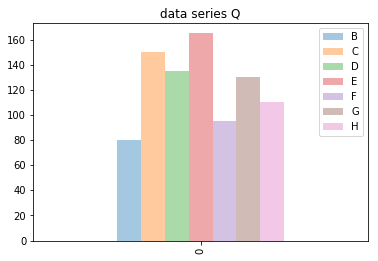

In [7]:
Q=industry[0:1]
Q.plot(kind = 'bar', style = 'b', alpha = 0.4, title = "data series Q")

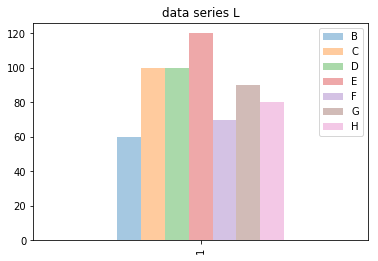

In [8]:
L=industry[1:2]
L.plot(kind = 'bar', style = 'b', alpha = 0.4, title = "data series L")

# c.

In [9]:
industry2=industry.drop('Country', axis = 1, inplace = False)
log_industry = industry2.apply(np.log)
log_industry.index=['Output','Labour','Capital']
print(log_industry)

                B         C         D         E         F         G         H
Output   4.382027  5.010635  4.905275  5.105945  4.553877  4.867534  4.700480
Labour   4.094345  4.605170  4.605170  4.787492  4.248495  4.499810  4.382027
Capital  3.912023  4.605170  4.382027  4.605170  4.094345  4.382027  4.248495


# d.

In [10]:
Y = log_industry[0:1] 
X = log_industry[1:3]

In [15]:
stack_Y =Y.stack()
new_Y= (stack_Y.unstack(level=0))
stack_X =X.stack()
new_X= (stack_X.unstack(level=0))

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(new_X, new_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 [0.14623321]


In [18]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.54842747 0.50874094]]


In [19]:
import statsmodels.formula.api as smf
stack_industry =log_industry.stack()
new_industry= (stack_industry.unstack(level=0))
new_industry.columns=['Output','Labour','Capital']
reg = smf.ols('Output ~ Capital + Labour', data=new_industry).fit()
reg.summary()

/Users/linbenyan/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:36:10   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
Capital        0.5087      0.083      6.150      0.004       0.279       0.738
Labour         0.5484      0.090      6.127      0.004       0.300       0.797
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# e.

In [20]:
pred_val = reg.fittedvalues.copy()
true_val = new_industry['Output'].values.copy()
residual = true_val - pred_val

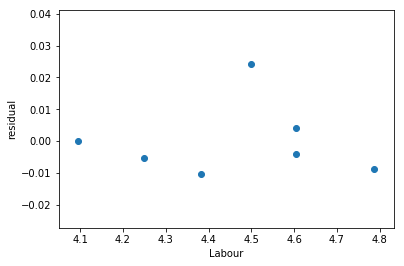

In [21]:
pl.scatter(new_industry[["Labour"]],residual)
pl.xlabel("Labour")
pl.ylabel("residual")
pl.show()

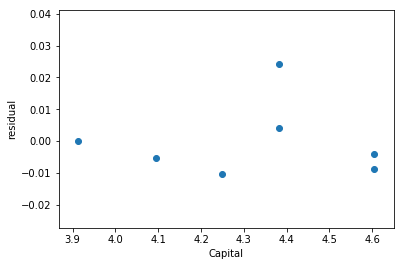

In [22]:
pl.scatter(new_industry[["Capital"]],residual)
pl.xlabel("Capital")
pl.ylabel("residual")
pl.show()

# f.

In [23]:
from sklearn import metrics
r_square=metrics.r2_score(pred_val, true_val)
k=2
n=7
adjustedr_square=r_square-(k-1)/(n-k)*(1-r_square)
adjustedr_square

0.9974958587349461